# Chapter 1 - Introduction to Exploratory Data Analysis

In [1]:
%%capture
!pip3 install matplotlib==3.8.2 numpy==1.26.3 pandas==2.2.0 pyarrow==15.0.0

In [2]:
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [3]:
def get_frequency_table(column, sort=False):
    count = column.value_counts()
    if sort:
        count = count.sort_index()
    frequency_table = pd.DataFrame({'value': count.index, 'count': count.values})
    frequency_table['freq'] = [None] * len(frequency_table)
    frequency_table['freq_acc'] = [None] * len(frequency_table)
    
    total = frequency_table['count'].sum()
    
    for i, row in frequency_table.iterrows():
        freq = round(row['count'] / total, 2)
        prev_freq_acc = 0 if i == 0 else frequency_table.at[i-1, 'freq_acc']
        frequency_table.at[i, 'freq'] = freq
        frequency_table.at[i, 'freq_acc'] = freq + prev_freq_acc
    return frequency_table

def plot_histogram(column, bin_edges=None):
    plt.figure(figsize=(4, 4))
    if not bin_edges:
        bin_edges = list(range(int(column.min()) - 1, int(column.max()) + 2))
    plt.hist(column, density=True, bins=bin_edges, edgecolor='black')
    plt.show()

def plot_pie(frequency_table, column_name):
    plt.figure(figsize=(4, 4))
    frequency_table = frequency_table.set_index("value")
    frequency_table["count"].plot.pie(autopct='%1.1f%%', startangle=90)
    plt.show()

def plot_boxplot(column):
    plt.figure(figsize=(4, 4))
    column.plot.box()
    plt.title('Boxplot')
    plt.show()

## Section 1.1 - What is Statistics?

### Q1. Classify as true or false each of the following statements:
**a. Statistics is a set of techniques used to organize a set of numerical values.**
> FALSE. Statistics handles more than numeric values, such as categorical ones. Also, it not only organizes but also makes inferences and performs more complex tasks.

**b. Every time that we are working with numbers, we should use Statistical Inference.**
> FALSE. We can also use Descriptive Statistics and Probability fields of study. Also, if the data refers to the entire population, it doesn't make sense to use Statistical Inference.

**c. Descriptive Statistics provides a correct approach to handling a set of values, numerical or not, with the goal of understanding the phenomenon of interest.**
> TRUE.

**d. Any sample represents, in an adequate manner, a population.**
> FALSE. If we don't select a correct sampling approach, it may not be representative of the population.

**e. Statistical techniques are not adequate for cases that involve destructive experiments, such as burning down equipment, destruction of proof bodies, etc.**
> FALSE. The statistical techniques are especially useful in cases where the object of study is damaged after experimentation, as they minimize the number of units that will be analyzed.

### Q2. For the situations described below, identify the population and the corresponding sample. Discuss the validity of the statistical inference process for each case.
**a. To assess the effectiveness of a vaccination campaign in the State of São Paulo, 200 mothers of newborns, during the first semester of a given year and in a specific maternity hospital in São Paulo, were interviewed regarding the last time they vaccinated their children.**
> Population: All mothers of newborns in the state of São Paulo
>
> Sample: 200 mothers from a single maternity hospital
>
> Validity: Mothers from different maternity hospitals should have been interviewed to avoid bias related to the chosen maternity hospital in the study. Otherwise, it cannot be claimed that the sample is representative of the population.

**b. A blood sample was taken from a patient suspected of having anemia.**
> Population: All the blood of the patient
> 
> Sample: A blood sample
> 
> Validity: The sample has the potential to be representative of the population if collected in a sufficient quantity, given that it is homogeneous in the entire body.

**c. To assess the viewership of a television program, 563 individuals were interviewed by phone regarding the channel they were tuned to.**
> Population: All individuals who watch television in Brazil
> 
> Sample: 563 individuals
> 
> Validity: Requiring that the interviewed people have telephones may be segregating in the sense that it is only selecting people from higher incomes, those who have access to this technology.

**d. In order to evaluate the voting intention for the president of Brazilians, 122 people were interviewed in Brasilia.**
> Population: All voters in Brazil
> 
> Sample: 122 voters from Brasilia
> 
> Validity: Doesn't seem to be representative, given the low number of interviewees and the bias related to the fact that only one city was included in the survey.

### Q3. Discuss, for each of the cases below, the precautions that need to be taken to ensure a good conclusion from the sample.
**a. A group of children will be chosen to receive a new meningitis vaccine.**
> It is important to ensure that the chosen group is diverse in terms of age, health conditions, and other relevant factors. Random sampling can help avoid bias and ensure a more representative sample.

**b. We randomly selected a certain number of housewives to test a new laundry detergent.**
> Care should be taken to ensure that the selected housewives represent a variety of demographics, such as age, location, and laundry habits. This helps in generalizing the results to a broader population of potential consumers.

**c. A factory wants to know if its cookie production tastes as expected.**
> The sampling process should include a variety of batches to account for potential variations in production. Randomly selecting samples from different production runs can help ensure a more accurate assessment of the overall product taste.

**d. Popular acceptance of a government project.**
> It's crucial to ensure a diverse representation of the population in the sample to avoid bias. Factors such as geographical location, age groups, and socio-economic backgrounds should be considered to capture a more comprehensive view of public opinion.

## Section 1.2 - Data Organization

### Q1. Classify each of the variables below as qualitative (nominal/ordinal) or quantitative (discrete/continuous):
**a. Occurrence of prenatal hypertension in pregnant women over 35 years old (yes or no are possible responses to this variable).**
> Qualitative nominal.

**b. Voting intention for president (possible responses are the names of the candidates, as well as don't know).**
> Qualitative nominal.

**c. Weight loss of athletes in the São Silvestre Race, in kilograms.**
> Quantitative continuous.

**d. Intensity of weight loss of marathon runners in the São Silvestre Race (light, moderate, strong).**
> Qualitative ordinal.

**e. Degree of satisfaction of the Brazilian population with regard to the work of their president (values from 0 to 5, with 0 indicating totally dissatisfied and 5 totally satisfied).**
> Qualitative ordinal.


### Q2. Fifteen patients from an orthopedic clinic were interviewed regarding the expected number of months of physiotherapy, whether there will be (Y) or not (N) sequelae after treatment, and the level of complexity of the performed surgery: high (H), medium (M), or low (L). The data are presented in the table below:

In [4]:
df = pd.DataFrame({
    "Patitents": list(range(1, 16)),
    "Physiotherapy": [7, 8, 5, 6, 4, 5, 7, 7, 6, 8, 6, 5, 5, 4, 5],
    "Sequelae": ['Y', 'Y', 'N', 'N', 'N', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N'],
    "Surgery": ['H', 'M', 'H', 'M', 'M', 'L', 'H', 'M', 'L', 'M', 'L', 'L', 'M', 'M', 'H']
})

df.T.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Patitents,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
Physiotherapy,7,8,5,6,4,5,7,7,6,8,6,5,5,4,5
Sequelae,Y,Y,N,N,N,Y,Y,N,N,Y,Y,N,Y,N,N
Surgery,H,M,H,M,M,L,H,M,L,M,L,L,M,M,H


**a. Classify each of the variables.**
> Patients: Qualitative nominal
> 
> Physiotherapy: Quantitative discrete
> 
> Sequelae: Qualitative nominal
> 
> Surgery: Qualitative ordinal

**b. For each variable, construct the frequency table and create a graphical representation.**


Frequency Table for Physiotherapy:



,value,count,freq,freq_acc
0,4,2,0.13,0.13
1,5,5,0.33,0.46
2,6,3,0.2,0.66
3,7,3,0.2,0.86
4,8,2,0.13,0.99


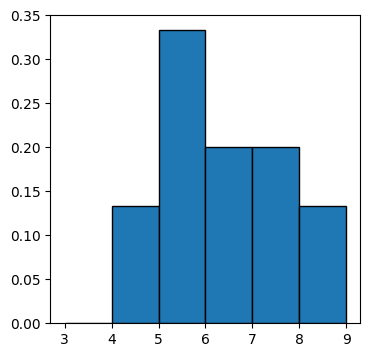


Frequency Table for Sequelae:



,value,count,freq,freq_acc
0,N,8,0.53,0.53
1,Y,7,0.47,1.0


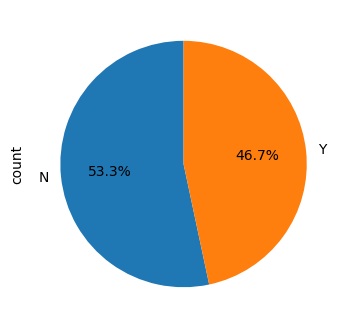


Frequency Table for Surgery:



,value,count,freq,freq_acc
0,M,7,0.47,0.47
1,H,4,0.27,0.74
2,L,4,0.27,1.01


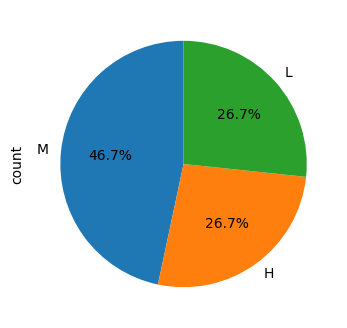

In [5]:
for column_name, sort, plot_type in [("Physiotherapy", True, "hist"), ("Sequelae", False, "pie"), ("Surgery", False, "pie")]:
    print(f"\nFrequency Table for {column_name}:\n")
    frequency_table = get_frequency_table(df[column_name], sort)
    display(frequency_table)
    if plot_type == "hist":
        plot_histogram(df[column_name])
    elif plot_type == "pie":
        plot_pie(frequency_table, column_name)

**c. For the group of patients who did not develop sequelae, create a bar chart for the Physiotherapy variable. Do you think this variable behaves differently in this group?**

,value,count,freq,freq_acc
0,5,3,0.38,0.38
1,6,2,0.25,0.63
2,4,2,0.25,0.88
3,7,1,0.12,1.0


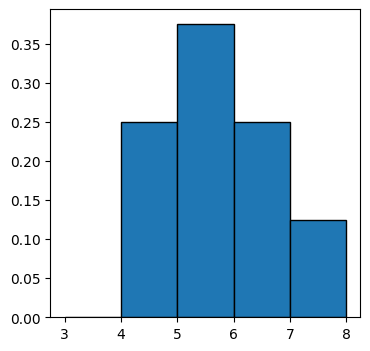

In [6]:
df = df[df.Sequelae=='N']
column_name = 'Physiotherapy'
display(get_frequency_table(df[column_name], sort))
plot_histogram(df[column_name])

> This group will take less months of physiotherapy

### Q3. The data below refer to the salary (in minimum wages) of 20 administrative employees in an industry.

In [7]:
df = pd.DataFrame({
    "Salary": [10.1, 7.3, 8.5, 5.0, 4.2, 3.1, 2.2, 9.0, 9.4, 6.1, 3.3, 10.7, 1.5, 8.2, 10.0, 4.7, 3.5, 6.5, 8.9, 6.1]
})

df.T.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Salary,10.1,7.3,8.5,5.0,4.2,3.1,2.2,9.0,9.4,6.1,3.3,10.7,1.5,8.2,10.0,4.7,3.5,6.5,8.9,6.1


**a. Construct a frequency table, grouping the data in intervals starting from 1 with a range of 2. Choose to include the lower limit and exclude the upper limit.**

In [8]:
ranges = []
for i in range(1, 13, 2):
    ranges.append((i, i+2))

df["Salary_ranges"] = [None] * len(df)
for i, row in df.iterrows():
    for _range in ranges:
        if row['Salary'] >= _range[0] and row['Salary'] < _range[1]:
            df.at[i, "Salary_ranges"] = f"{_range[0]:02d}-{_range[1]:02d}"
            break

frequency_table = get_frequency_table(df["Salary_ranges"], True)
display(frequency_table)

,value,count,freq,freq_acc
0,01-03,2,0.1,0.1
1,03-05,5,0.25,0.35
2,05-07,4,0.2,0.55
3,07-09,4,0.2,0.75
4,09-11,5,0.25,1.0


**b. Construct the histogram and calculate the 1st and 3rd quartiles.**

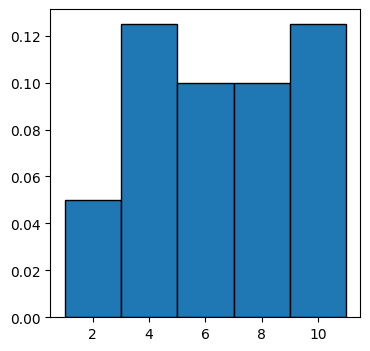

In [9]:
plot_histogram(df["Salary"], bin_edges=range(1, 13, 2))

In [10]:
q1 = round(np.percentile(df["Salary"], 25), 2)
q3 = round(np.percentile(df["Salary"], 75), 2)

print(f"1st quantile: {q1}, 3rd quantile: {q3}")

1st quantile: 4.03, 3rd quantile: 8.93


**c. Construct the box plot using the raw data.**

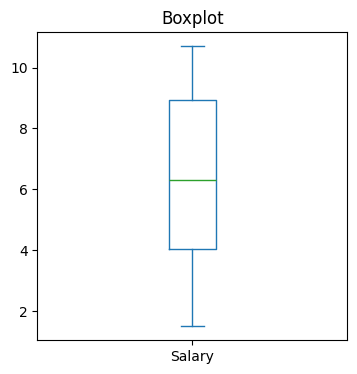

In [11]:
plot_boxplot(df["Salary"])

### Q4. A group of high school students underwent a math test resulting in:

In [12]:
df = pd.DataFrame({
    "Grade": ["0-2", "2-4", "4-6", "6-8", "8-10"],
    "Frequency": [14, 28, 27, 11, 4]
})

df.head()

,Grade,Frequency
0,0-2,14
1,2-4,28
2,4-6,27
3,6-8,11
4,8-10,4


**a. Construct the histogram.**

**b. If the passing grade is 5, what percentage of students passed?**

**c. With the information available, obtain the box plot and indicate any assumptions made.**

### Q5. A study aims to verify if the problem of malnutrition in adults, measured by weight in kilograms in an agricultural region (Region A), is greater than in an industrial region (Region B). For this purpose, a sample was taken in each region, providing the following frequency table:

_{Table in the Book}_

**a. Do the presented data suggest that the degree of malnutrition is different in the two regions? (Note that the total number of observations differs in each region).**
>

**b. Based on the data in the tables, construct a histogram for each region. Make a suitable assumption for the undefined ranges.**
>

**c. Using the histograms obtained in (b) and appropriate assumptions, obtain the necessary measures to construct a box plot for the weight of adults in each region, addressing the issue in part (a).**
>

**d. Utilizing the median and quartiles obtained in (c), determine the Bowley's skewness coefficient for the weight of adults in each region. Assess whether these coefficient values align with the patterns observed in (b) and (c).**
> 


### Q6. In a clinical study, two anesthetics are being evaluated. Each of the drugs Alpha and Beta was administered to different groups of 18 guinea pigs, all of which had approximately the same physical characteristics, including weight and age. The time for the complete effect of the anesthetics was measured in seconds for each animal. The results, after sorting, are presented below.

_{Table in the Book}_

**a. Construct a box plot for the effect time of each anesthetic and comment on the differences found.**
>

**b. For the effect time of each medication, determine Bowley's skewness coefficient and comment on the results.**
>

**c. Compare the performance of the anesthetics using a Q-Q plot.**
>

## Section 1.3 - The Use of Computers in Statistics

### Q1. Using a spreadsheet or available statistical software and the information from Table 1.1, create a database for the 20 individuals with the entered values, including the initial letters and the variables Gender, Age, Height, and Weight. Print and verify the information.
>


### Q2. Considering the database created in Exercise 1 of this section, construct appropriate graphical representations for the four variables and describe their behaviors.
>


### Q3. Considering the database created in Exercise 1 of this section, divide age into three categories (under 18 years, age between 18 and 21 inclusive, and over 21 years). Create bar charts for this variable, including all individuals and one for each gender. Interpret the obtained results.
>


## Section 1.4 - Chapter Exercises

### Q1. Answer true or false, justifying:
**a. Suppose two samples are collected from the same population, with one having a size of 100 and the other 200. Then, the larger sample is more representative of the population.**
>

**b. Two variables with different values can have identical histograms.**
> 

**c. Two variables with identical box plots cannot have different values.**
>


### Q2. Suppose two companies wish to employ you, and after considering the advantages of each, you will choose the one that pays you better. After some research, you obtain the salary distribution of the companies, given by the plots below. Based on the information from each graph, what would be your decision?

_{Plots in the Book}_


### Q3. A survey of public transportation users in São Paulo inquired about the different types used for their daily commutes. Among buses, subway, and trains, the number of different transportation modes used was as follows: 2, 3, 2, 1, 2, 1, 2, 1, 2, 3, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2, and 3.
**a. Organize a frequency table.**
>

**b. Create a graphical representation.**
>

**c. Assuming that this sample represents the behavior of São Paulo users well, do you think the percentage of users using more than one type of transportation is significant?**
>

### Q4. The ages of the 20 newcomers in a certain year in the postgraduate journalism program at a university were as follows: 22, 22, 22, 22, 23, 23, 24, 24, 24, 24, 25, 25, 26, 26, 26, 26, 27, 28, 35 and 40.
**a. Present the data in a frequency table, including the relative frequency.**
>

**b. Atypical ages seem to have occurred that year. After their removal from the dataset, redo item (a). Comment on the differences found.**
> 

### Q5. A new healing medication is being tested, and an experiment is conducted to study the time (in days) for complete closure in incisions from surgery. A sample of thirty guinea pigs provided the values: 15, 17, 16, 15, 17, 14, 17, 16, 16, 17, 15, 18, 14, 17, 15, 14, 15, 16, 17, 18, 18, 17, 15, 16, 14, 18, 18, 16, 15, and 14.
**a. Organize a frequency table.**
>

**b. What percentage of observations are below 16 days?**
>

**c. Classify as fast the healings equal to or less than 15 days and as slow the others. Make a pie chart indicating the percentages for each classification.**
>

### Q6. The Health Center in a certain neighborhood keeps a record of the number of children in families that use the Center. The data are as follows: 3, 4, 3, 4, 5, 1, 6, 3, 4, 5, 3, 4, 3, 3, 4, 3, 5, 5, 5, 5, 6, 11, 10, 2, 1, 2, 3, 1, 5 and 2.
**a. Organize a frequency table.**
>

**b. Make a graphical representation.**
>

**c. Do you identify very discrepant values? What to do with them?**
>


### Q7. A questionnaire was administered to the ten employees in the accounting department of a company, providing the data presented in the table.

_{Table in the Book}_

**a. Classify each of the variables**
>

**b. Create a graphical representation for the variable Course.**
>

**c. Discuss the best way to construct the frequency table for the variable Age. Build a graphical representation.**
>

**d. Repeat item (c) for the variable Salary.**
>

**e. Considering only employees with more than three years in the company, describe the behavior of the Salary variable.**
>

### Q8. A group of pedagogues studies the influence of changing schools on the performance of elementary school students. As part of the survey, the number of schools attended by participating students was recorded.

_{Table in the Book}_

**a. What is the percentage of students who attended more than one school?**
>

**b. Build the bar graph.**
>

**c. Classify students into two groups according to turnover: high for students with more than 2 schools and low for others. Obtain the frequency table for this variable.**
>

### Q9. Students from the School of Physical Education underwent a endurance test based on the number of kilometers they could run without stopping. The data are presented below.

_{Table in the Book}_

**a. What is the variable under study?**
>

**b. Build the histogram.**
>

**c. Determine the 1st, 2nd, and 3rd quartiles.**
>

### Q10. The time spent using ATMs depends on each user and the operations performed. 26 measurements of this time (in minutes) were collected:

_{Table in the Book}_

**a. Organize a frequency table without grouping the data.**
>

**b. Group the data into intervals of size 0.2 starting from 0.8 and obtain a new frequency table.**
>

**c. Compare the tables obtained in (a) and (b). Comment on the differences.**
>

**d. Construct the box plot from the raw data table.**
>

### Q11. Twenty-one patients from a medical clinic had their plasma potassium levels measured. The results were as follows:

_{Table in the Book}_

**a. Construct the histogram.**
>

**b. Determine the 1st, 2nd, and 3rd quartiles.**
>

**c. What percentage of values are above level 3?**
>

### Q12. Measurements were taken on construction workers regarding the blood hemoglobin level (in grams/cm³):

_{Table in the Book}_

**a. Organize the data into intervals of size 1 starting from 11.**
>

**b. Construct the histogram.**
>

**c. Determine the third quartile and the median.**
>

**d. Rates below 12 or above 16 are considered abnormal and require medical follow-up. Obtain the frequency table for the variable Medical Follow-up with two options: yes or no.**
>

**e. Using the raw data table, construct the box plot.**
>

### Q13. The average selling price of a 60-kilogram bag of corn on the Grain Exchange is presented below for the last 40 months, in a certain monetary unit.

_{Table in the Book}_

**a. Organize the data into intervals of size 0.4 starting from 6.**
>

**b. Construct the histogram.**
>

**c. Calculate the second quartile.**
>

**d. Construct the box plot using the raw data.**
>

### Q14. The number of goals scored in a championship of the São Paulo Football Federation by the 20 participating clubs in their games is a variable with the following values:

_{Table in the Book}_

**a. Classify the variable. Do you think it is reasonable to construct a frequency table according to the given classification?**
>

**b. Construct a frequency table grouping the observations in intervals of length 10 starting from 20 (do not forget to clearly indicate the intervals).**
>

**c. Obtain the histogram.**
>

**d. Using the histogram, what percentage of the clubs scored more than 38 goals?**
>


### Q15. The table below presents the relative frequencies of height ranges (in cm) for a sample of 100 12-year-old children.

_{Table in the Book}_

**a. Construct the histogram.**
>

**b. Making appropriate assumptions, obtain the box plot.**
>

**c. Wishing to separate the top 15%, what would be the cutoff point?**
>

### Q16. Germination rate is one of the main scientific factors to define seed quality. It is determined in a scientific experiment conducted by the manufacturer and regulated by supervisory bodies. A manufacturer claims that the germination rate of its corn seeds is 85%. To verify this claim, a farmers' cooperative randomly selected 100 samples, each of size 100, and recorded the germination percentage in each sample.

_{Table in the Book}_

**a. Create a graphical representation of the table above.**
>

**b. With the appropriate assumptions, construct the box plot.**
>

**c. Comment on the manufacturer's claim.**
>


### Q17. A new feed was provided to recently weaned pigs, and its efficiency is to be evaluated. The traditional feed resulted in a weight gain of around 3.5 kg in one month. Below are the data related to the gain, in kilograms, for this new feed, applied for one month to 200 animals under the specified conditions.

_{Table in the Book}_

**a. Construct the histogram.**
>

**b. Determine the 1st, 2nd, and 3rd quartiles.**
>

**c. Do you think the new feed is more efficient than the traditional one? Justify.**
>

### Q18. In a study on workforce turnover in the industry, the number of jobs in the last 3 years was recorded for skilled and unskilled workers.

_{Table in the Book}_

**a. Construct the corresponding bar chart for each table using percentages on the ordinate axis.**
>

**b. Combine the information from both tables into one and obtain a bar chart of workforce turnover in the industry (without differentiating by specialization).**
>

**c. Do you think skilled workers change jobs less? Justify.**
>

### Q19. As part of a medical assessment at a certain university, the heart rate of first-year students was measured. The data is presented below.

_{Table in the Book}_

**a. Obtain the histogram.**
>

**b. Heart rates below 62 or above 92 require medical attention. What percentage of students are in these conditions?**
>

**c. A frequency around 72 beats per minute is considered standard. Do you think these students generally fit into this category?**
>
